In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder 

import seaborn as sns

from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.rename(columns = {'Genre' : 'Gender', 
                     'Spending Score (1-100)':'Spending_Score', 
                     'Annual Income (k$)':'Annual_Income'}, inplace=True)
 

In [6]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape


(200, 5)

In [8]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [10]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [11]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
print('There are {} customers.'.format(len(df)))

There are 200 customers.


In [13]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

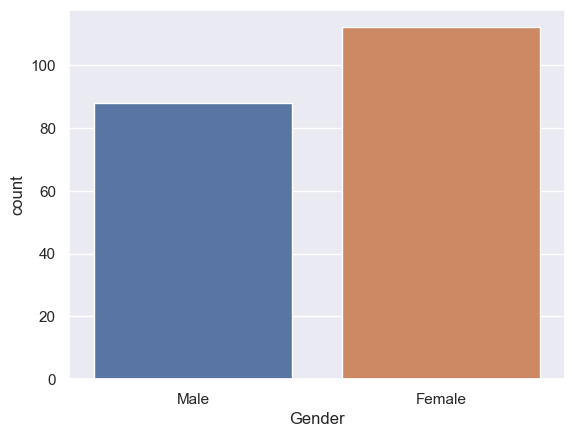

In [14]:
sns.set()
sns.countplot(x=df.Gender,data=df)
plt.show()

In [15]:
pd.pivot_table(df,index=["Gender"],values=["Spending_Score"])

,Spending_Score
Gender,
Female,51.526786
Male,48.511364


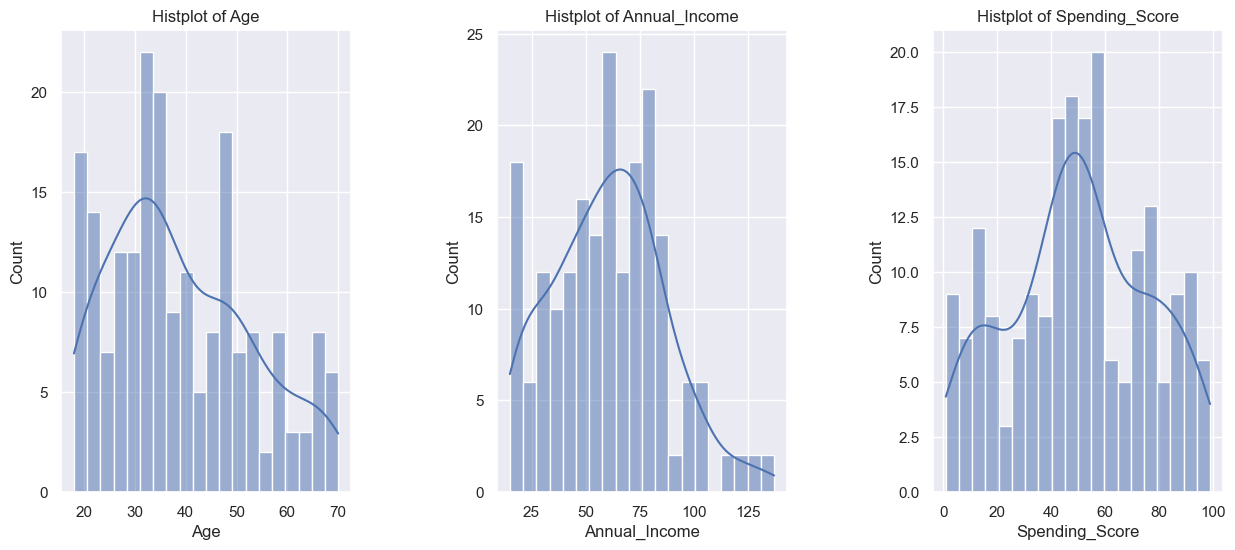

In [16]:
#Analysis and visualization on the data
plt.figure(1, figsize=(15, 6))
n = 0

for x in ['Age', 'Annual_Income', 'Spending_Score']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=20, kde=True)  # Use histplot
    plt.title('Histplot of {}'.format(x))

plt.show()

In [17]:
print('Mean is {0} Median is {1}'.format(df.Age.mean( ),df.Age.median( )))

Mean is 38.85 Median is 36.0


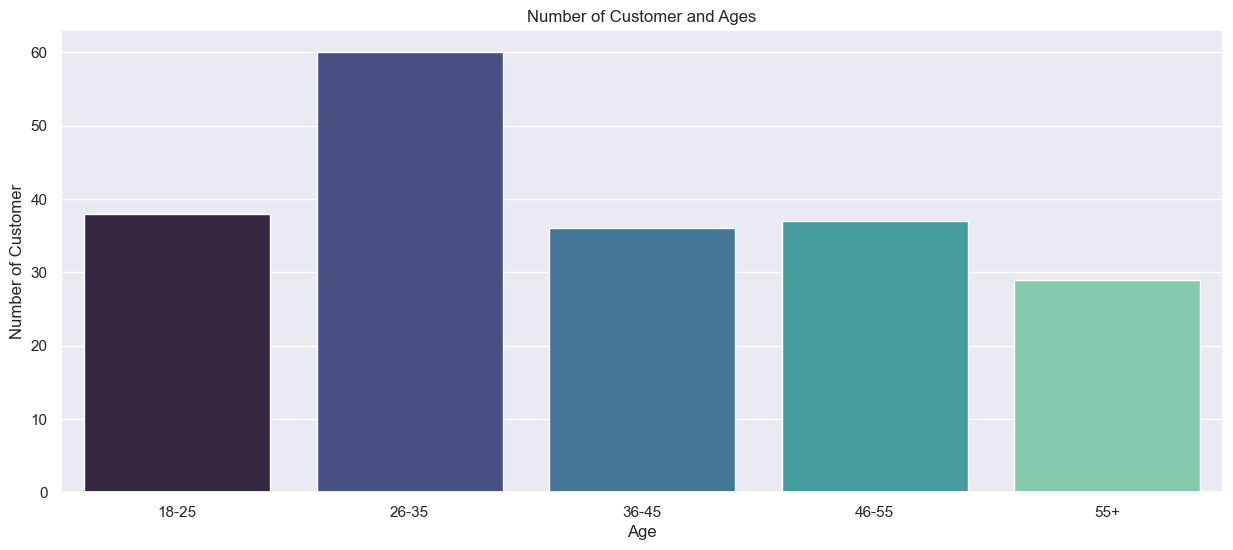

In [18]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]

agex = ["18-25", "26-35", "36-45","46-55", "55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))       
sns.barplot(x=agex, y=agey, palette="mako")       
plt.title("Number of Customer and Ages")
plt.xlabel("Age")   
plt.ylabel("Number of Customer")
plt.show()


C:\Users\sruth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


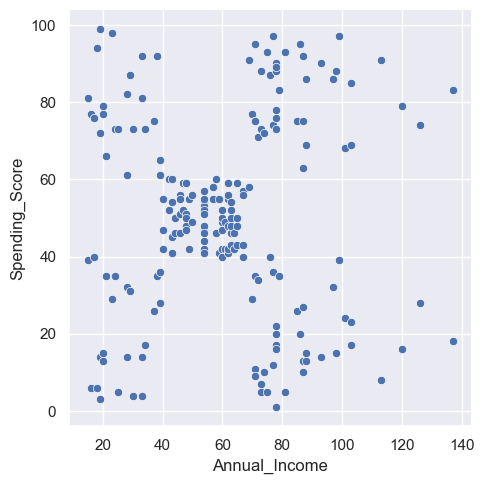

In [19]:
sns.relplot(x="Annual_Income", y="Spending_Score", data=df)

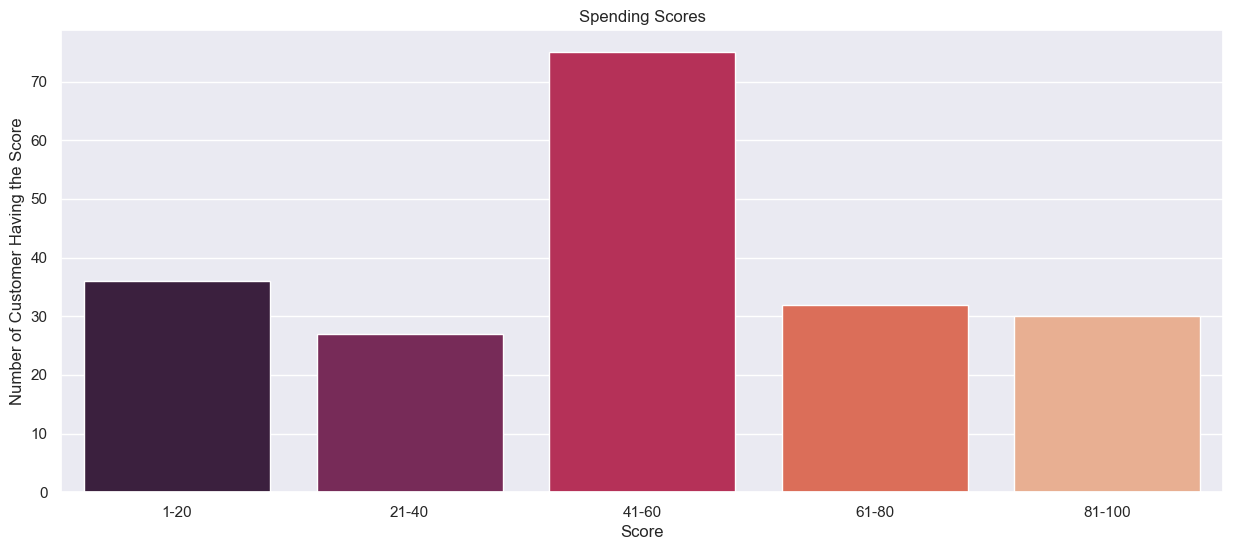

In [20]:
#Spending Scores
ss_1_20 = df["Spending_Score"][(df["Spending_Score"] >= 1) & (df["Spending_Score"] <= 20)] 
ss_21_40 = df["Spending_Score"][(df["Spending_Score"] >= 21) & (df["Spending_Score"] <= 40)] 
ss_41_60 = df["Spending_Score"][(df["Spending_Score"] >= 41) & (df["Spending_Score"] <= 60)] 
ss_61_80 = df["Spending_Score"][(df["Spending_Score"] >= 61) & (df["Spending_Score"] <= 80)] 
ss_81_100 = df["Spending_Score"][(df["Spending_Score"] >= 81) & (df["Spending_Score"] <= 100)] 

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))       
sns.barplot(x=ssx, y=ssy, palette="rocket")       
plt.title("Spending Scores")
plt.xlabel("Score")   
plt.ylabel("Number of Customer Having the Score")
plt.show()


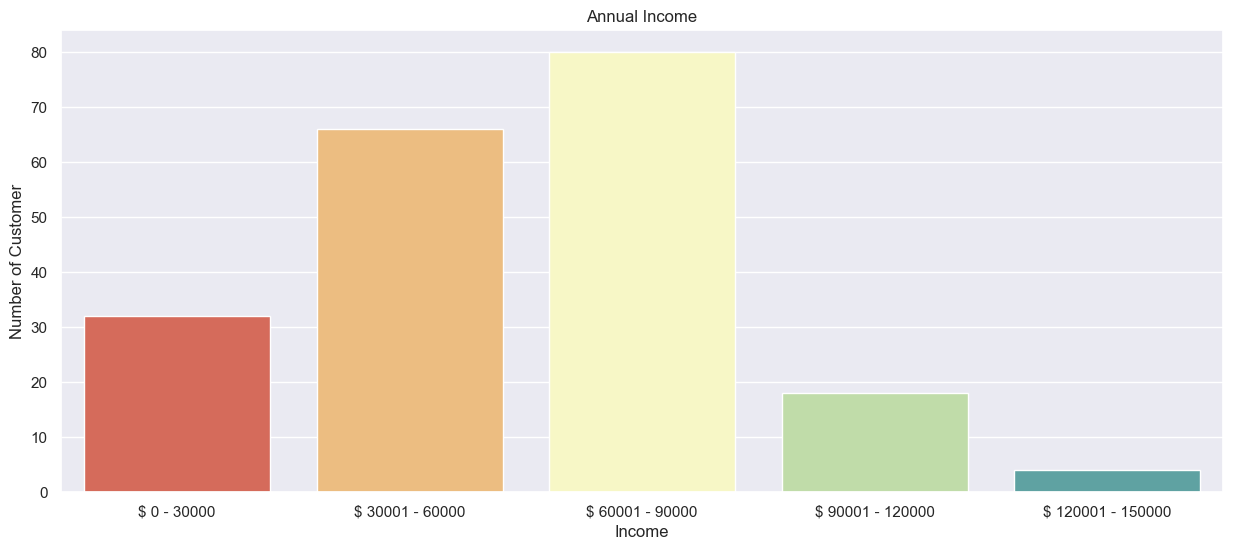

In [21]:
#Annual Income
ai_0_30 = df["Annual_Income"][(df["Annual_Income"] >= 0) & (df["Annual_Income"] <= 30)] 
ai_31_60 = df["Annual_Income"][(df["Annual_Income"] >= 31) & (df["Annual_Income"] <= 60)] 
ai_61_90 = df["Annual_Income"][(df["Annual_Income"] >= 61) & (df["Annual_Income"] <= 90)] 
ai_91_120 = df["Annual_Income"][(df["Annual_Income"] >= 91) & (df["Annual_Income"] <= 120)] 
ai_121_150 = df["Annual_Income"][(df["Annual_Income"] >= 121) & (df["Annual_Income"] <= 150)] 

aix = ["$ 0 - 30000", "$ 30001 - 60000", "$ 60001 - 90000", "$ 90001 - 120000", "$ 120001 - 150000"]
aiy = [len(ai_0_30),len(ai_31_60),len(ai_61_90),len(ai_91_120),len(ai_121_150)]

plt.figure(figsize=(15,6))       
sns.barplot(x=aix, y=aiy, palette="Spectral")       
plt.title("Annual Income")
plt.xlabel("Income")   
plt.ylabel("Number of Customer")
plt.show()

C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

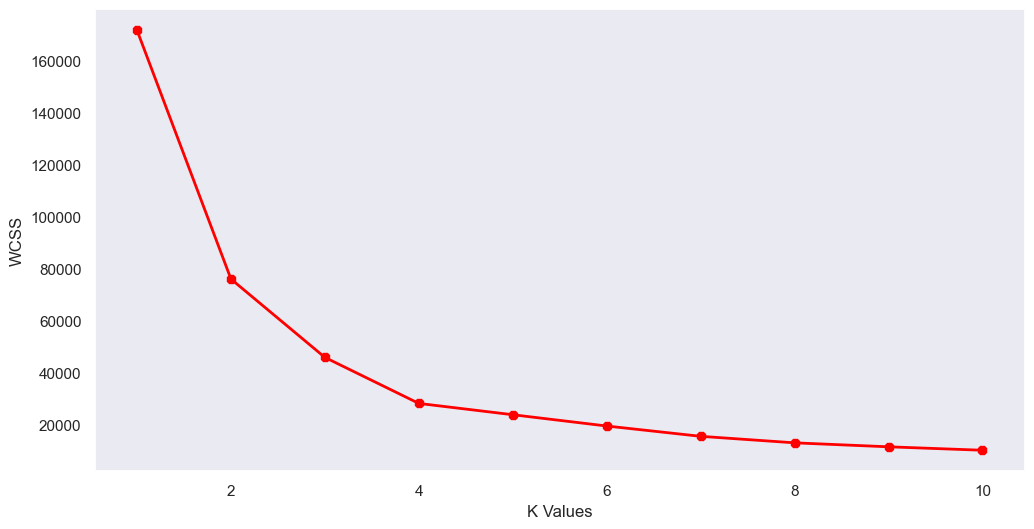

In [26]:
#finding the optimal number of clusters using sum of square method
X1=df.loc[:, ["Age", "Spending_Score"]].values


WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    WCSS.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1, 11), WCSS, linewidth=2, color="red", marker="8")
plt.xlabel("K Values")   
plt.ylabel("WCSS")
plt.show()

In [38]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [39]:
#printing the centeroids
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


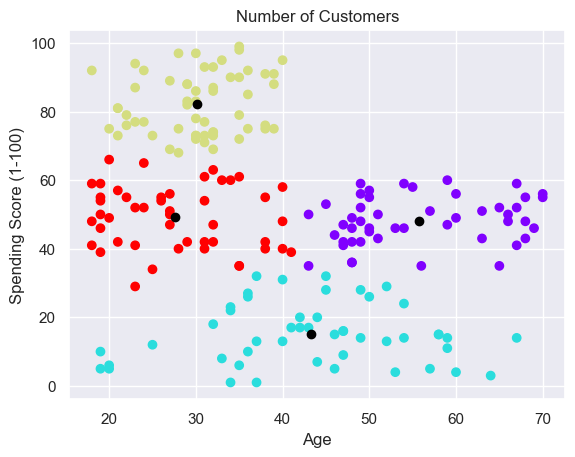

In [40]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title("Number of Customers")
plt.xlabel("Age")   
plt.ylabel("Spending Score (1-100)")
plt.show()

C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

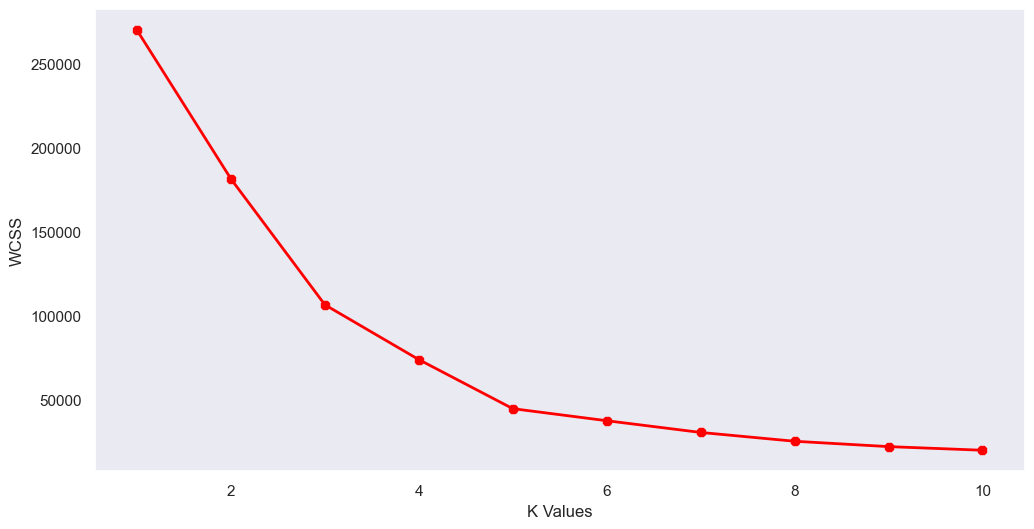

In [33]:
X2=df.loc[:, ["Annual_Income", "Spending_Score"]].values

from sklearn.cluster import KMeans
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    WCSS.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1, 11), WCSS, linewidth=2, color="red", marker="8")
plt.xlabel("K Values")   
plt.ylabel("WCSS")
plt.show()

In [41]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 0 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 0 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [42]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


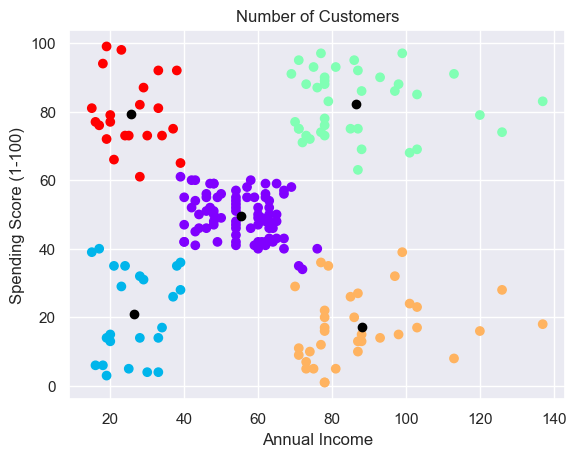

In [43]:
plt.scatter(X2[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title("Number of Customers")
plt.xlabel("Annual Income")   
plt.ylabel("Spending Score (1-100)")
plt.show()

C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

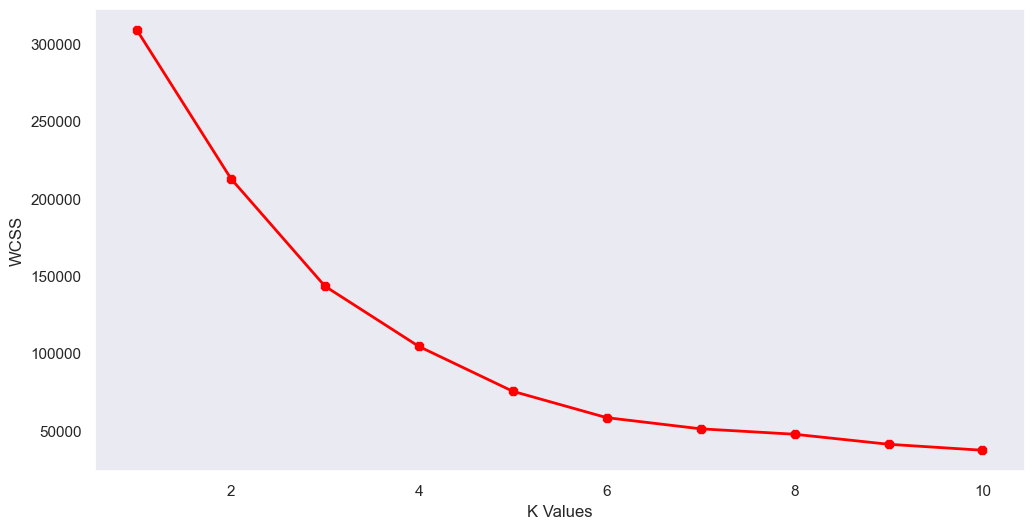

In [45]:
X3=df.iloc[:,1:]

from sklearn.cluster import KMeans
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    WCSS.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1, 11), WCSS, linewidth=2, color="red", marker="8")
plt.xlabel("K Values")   
plt.ylabel("WCSS")
plt.show()

In [46]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X3)
print(label)

C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [47]:
print(kmeans.cluster_centers_)



[[45.2173913  26.30434783 20.91304348]
 [42.9375     55.0875     49.7125    ]
 [32.69230769 86.53846154 82.12820513]
 [40.66666667 87.75       17.58333333]
 [25.27272727 25.72727273 79.36363636]]


C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


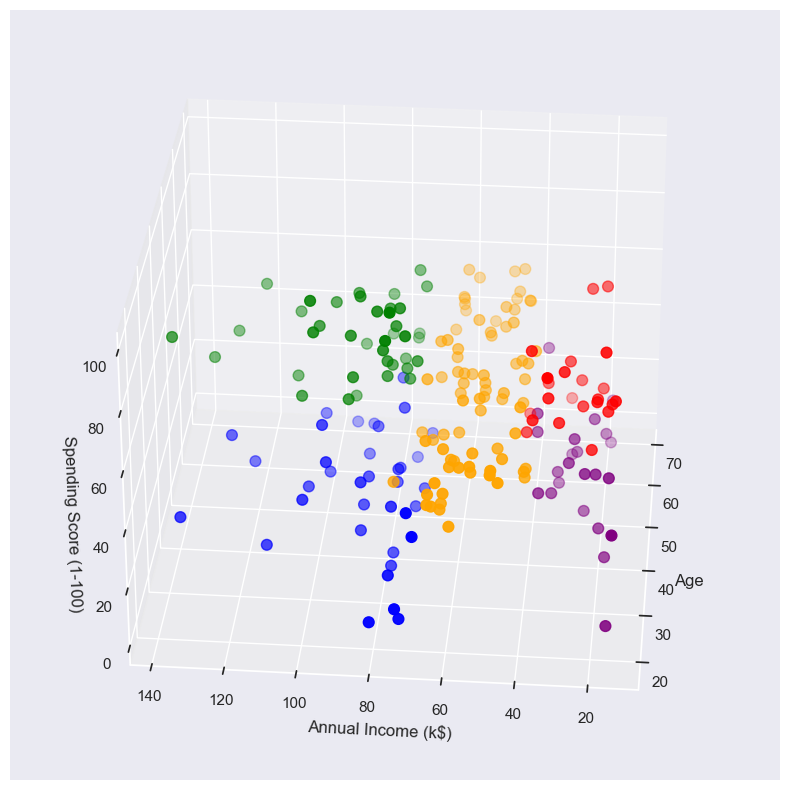

In [51]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label == 0], df["Annual_Income"][df.label == 0], df["Spending_Score"][df.label == 0], c = 'blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual_Income"][df.label == 1], df["Spending_Score"][df.label == 1], c = 'red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual_Income"][df.label == 2], df["Spending_Score"][df.label == 2], c = 'green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual_Income"][df.label == 3], df["Spending_Score"][df.label == 3], c = 'orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual_Income"][df.label == 4], df["Spending_Score"][df.label == 4], c = 'purple', s=60)
ax.view_init(30, 185)

plt.xlabel("Age")   
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()

In [52]:
df = pd.get_dummies(df, drop_first=True)

In [53]:
df.head()

,Age,Annual_Income,Spending_Score,label,Gender_Male
0,19,15,39,4,True
1,21,15,81,1,True
2,20,16,6,4,False
3,23,16,77,1,False
4,31,17,40,4,False


In [55]:
#Initialize cluster
k_cluster = KMeans(n_clusters=5, random_state=0)

C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

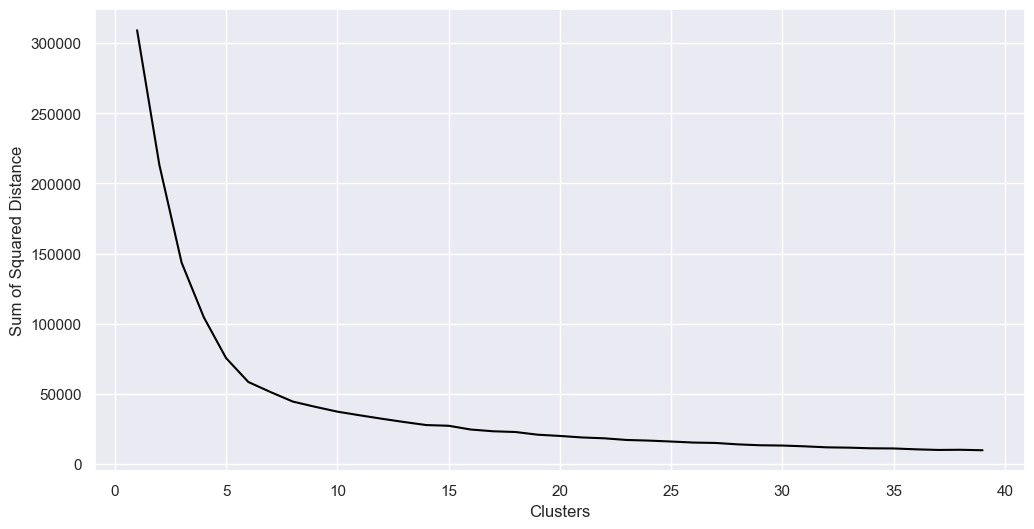

In [56]:
ssq_distance = []

for k in range(1,40):

    cluster = KMeans (n_clusters=k, random_state=0)

    cluster.fit(df)

    ssq_distance.append(cluster. inertia_)

plt.figure(1, figsize = (12,6))

plt.plot(list(range(1,40)), ssq_distance, color='black')

plt.xlabel('Clusters'), plt.ylabel('Sum of Squared Distance')

plt.show()

In [58]:

k_cluster.fit(df)

k_labels = k_cluster.labels_

C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


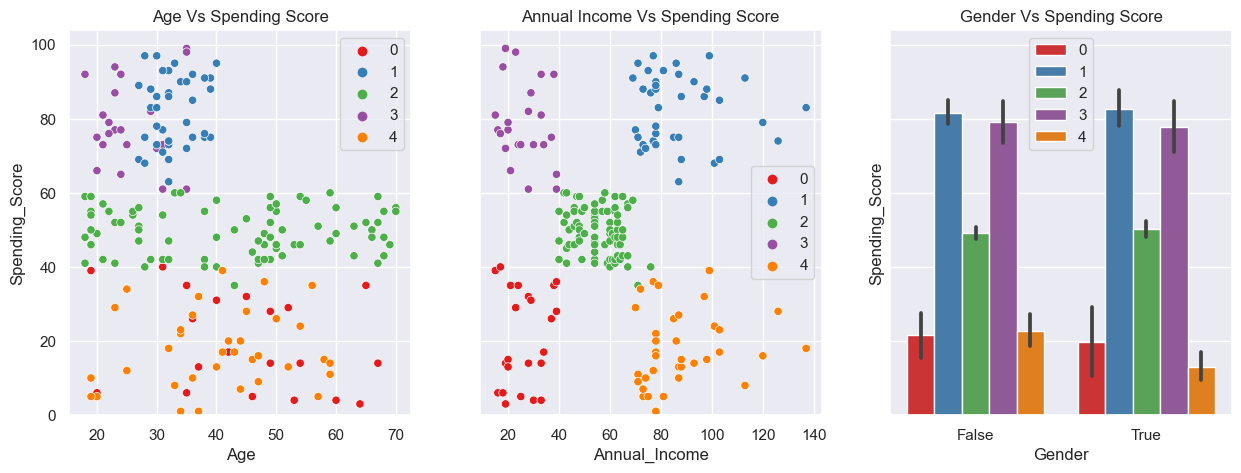

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.scatterplot(ax=axes[0],x=df.Age, y=df.Spending_Score, hue=k_labels, palette='Set1') 
axes[0].set_title('Age Vs Spending Score')

sns.scatterplot (ax=axes[1], x=df.Annual_Income, y=df.Spending_Score, hue=k_labels, palette='Set1') 
axes[1].set_title('Annual Income Vs Spending Score')

sns.barplot(ax=axes[2], x=df.Gender_Male, y=df.Spending_Score, hue=k_labels, palette='Set1') 
axes[2].set_title('Gender Vs Spending Score')
axes[2].set_xlabel('Gender')

plt.show()

In [60]:
dbscan = DBSCAN(eps=5, min_samples=5)
db_labels = dbscan.fit_predict(df)

In [66]:
no_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print('There are {} clusters'.format(no_clusters))

There are 4 clusters


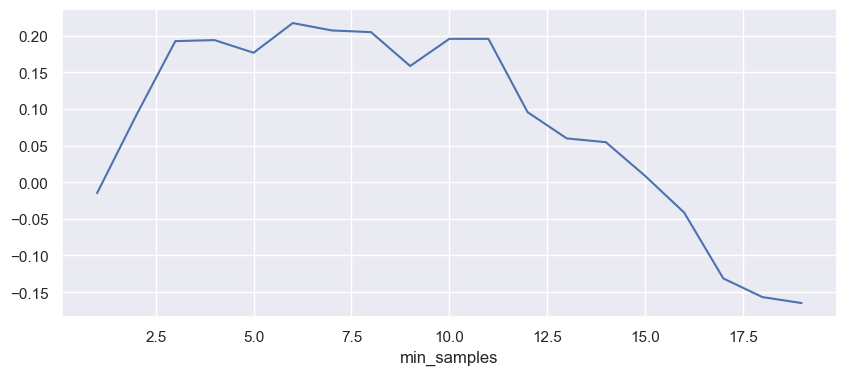

In [67]:
from sklearn import metrics
sh_score = []
for num in range(1,20):
    dbscan=DBSCAN(eps=12, min_samples=num)
    model=dbscan.fit(df)
    d_labels=model.labels_
    score = metrics.silhouette_score(df,d_labels)
    sh_score.append(score)
plt.figure(figsize=(10,4))
plt.plot(list(range(1,20)), sh_score)
plt.xlabel('min_samples')
plt.show()

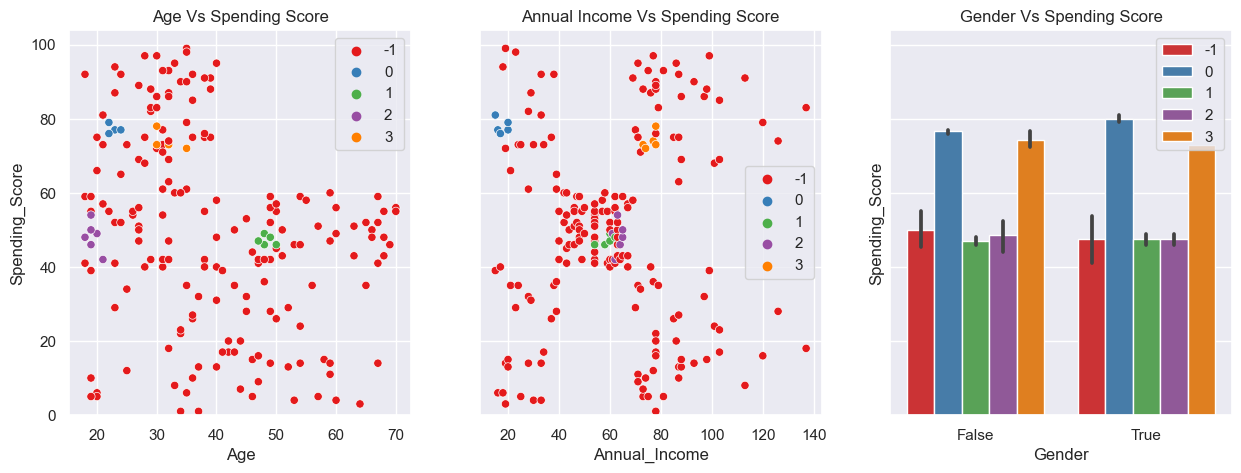

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.scatterplot(ax=axes[0],x=df.Age, y=df.Spending_Score, hue=db_labels, palette= 'Set1') 
axes[0].set_title('Age Vs Spending Score')

sns.scatterplot(ax=axes[1], x=df.Annual_Income, y=df.Spending_Score, hue=db_labels, palette= 'Set1')

axes[1].set_title('Annual Income Vs Spending Score')

sns.barplot(ax=axes[2], x=df.Gender_Male, y=df.Spending_Score, hue=db_labels, palette='Set1')

axes [2].set_title('Gender Vs Spending Score')

axes[2].set_xlabel('Gender')

plt.show()

In [64]:
coef = metrics.silhouette_score (df,k_labels)

print('The sihoutte score is {}'.format(coef))

The sihoutte score is 0.44474910239085313


In [65]:
coef = metrics.silhouette_score (df,d_labels)

print('The sihoutte score is {}'.format(coef))

The sihoutte score is -0.16497526497583068
